# Bootstrapping - Total H-Bond Count vs TPSA

As Veber et. al (2002) points out in their article, Total H-Bond Count and TPSA are interchangeable.
This notebook purpose is to investigate if the percentage difference is the significant or not and for this, we're going to use bootstrapping (yay!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing dataset
drugs_db = pd.read_csv('../data/correlation_dataset.csv')
print(drugs_db.columns)

# We just need two columnss as numpy arrays for this purpose, the tpsa and h_sum columns
tpsa_data = np.array(drugs_db.tpsa)
h_sum_data = np.array(drugs_db.h_sum)

Index(['Unnamed: 0', 'active_ingredient_moiety', 'nda_bla', 'approval_year',
       'active', 'DrugBank ID', 'Drug Groups', 'SMILES', 'Name', 'Drug Type',
       'route', 'mw', 'n_hba', 'n_hbd', 'logp', 'tpsa', 'rb', 'h_sum',
       'follow_mw', 'follow_n_hba', 'follow_n_hbd', 'follow_logp',
       'follow_tpsa', 'follow_rb', 'follow_h_sum', 'follow_tpsa_or_h_sum',
       'countplot'],
      dtype='object')


In [9]:
def bootstrap_percent_below_threshold(data, threshold, n_iter=1000):
    """
    Performs bootstrap sampling on the data and calculates the percentage of data that
    falls below the threshold for each iteration.
    
    Args:
        data (ndarray): The input data.
        threshold (float): The threshold value.
        n_iter (int): The number of bootstrap iterations to perform.
        
    Returns:
        ndarray: An array containing the percentage of data that falls below the threshold
        for each iteration.
    """
    n_samples = len(data)
    percent_below_threshold = np.zeros(n_iter)
    for i in range(n_iter):
        # Generate a bootstrap sample of the data
        bootstrap_sample = np.random.choice(data, size=(n_samples), replace=True)
        
        # Calculate the percentage of data that falls below the threshold
        percent_below_threshold[i] = np.sum(bootstrap_sample <= threshold) / n_samples * 100
        
    return percent_below_threshold


In [18]:
tpsa_percentage_dist = bootstrap_percent_below_threshold(tpsa_data, 140, n_iter=10000)
h_sum_percentage_dist = bootstrap_percent_below_threshold(h_sum_data, 12, n_iter=10000)

78.68525754884547


(70.0, 90.0)

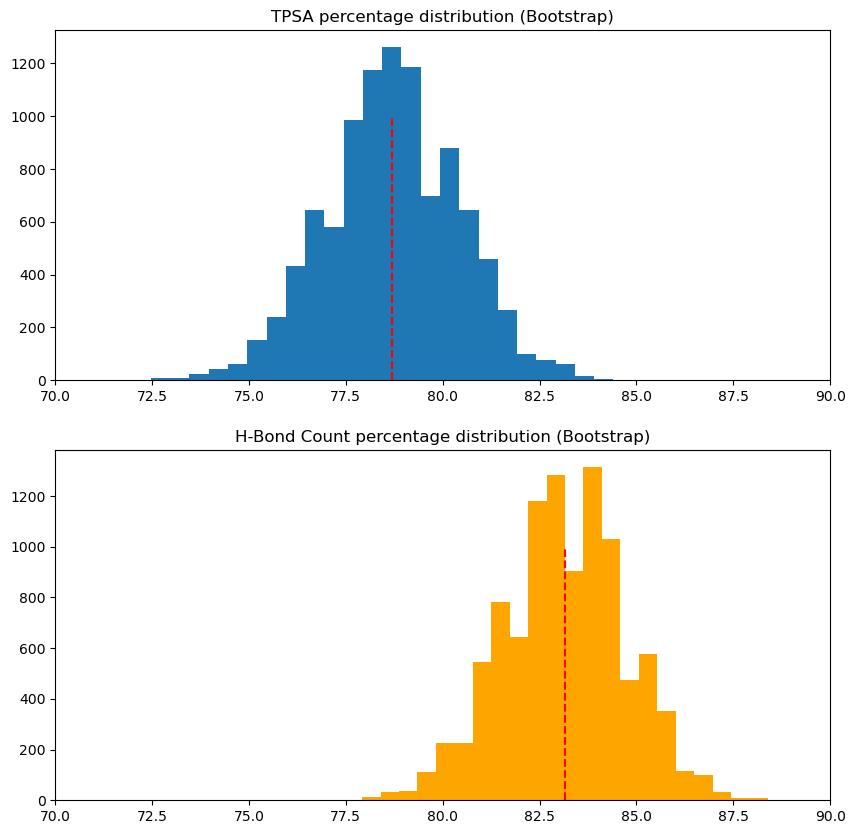

In [19]:
mean_tpsa = np.average(tpsa_percentage_dist)
mean_h_sum = np.average(h_sum_percentage_dist)

print(mean_tpsa)
fig, axs = plt.subplots(2, figsize=(10,10))
axs[0].hist(tpsa_percentage_dist, bins=25)
axs[0].set_title("TPSA percentage distribution (Bootstrap)")
axs[0].vlines(x=mean_tpsa,ymin=0, ymax=1000, color = 'red', linestyles='dashed')
axs[0].set_xlim(70,90)

axs[1].hist(h_sum_percentage_dist, bins=25, color='orange')
axs[1].set_title("H-Bond Count percentage distribution (Bootstrap)")
axs[1].vlines(x=mean_h_sum,ymin=0, ymax=1000, color = 'red', linestyles='dashed')
axs[1].set_xlim(70,90)

In [20]:
tpsa_df = pd.DataFrame(tpsa_percentage_dist)
h_sum_df = pd.DataFrame(h_sum_percentage_dist)

In [21]:
tpsa_df.describe()

,0
count,10000.000000
mean,78.685258
std,1.714028
min,72.468917
25%,77.619893
50%,78.685613
75%,79.928952
max,84.902309


In [22]:
h_sum_df.describe()

,0
count,10000.000000
mean,83.144796
std,1.567378
min,77.442274
25%,82.060391
50%,83.126110
75%,84.191829
max,89.342806


In [23]:
print(f"Range of mean+- standard deviation of TPSA dist: {tpsa_df.describe()[0][1]} +- {tpsa_df.describe()[0][2]}")
print(f"Range of mean+- standard deviation of H-Bond Sum dist: {h_sum_df.describe()[0][1]} +- {h_sum_df.describe()[0][2]}")

Range of mean+- standard deviation of TPSA dist: 78.68525754884547 +- 1.7140283659007443
Range of mean+- standard deviation of H-Bond Sum dist: 83.14479573712255 +- 1.5673777609039286


In [24]:
from scipy.stats import f_oneway
f_oneway(tpsa_percentage_dist, h_sum_percentage_dist)

F_onewayResult(statistic=36865.76418550216, pvalue=0.0)